In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = []
with open('speed-test-data.txt') as f:
    for line in f:
        data.append(json.loads(line))
dt = pd.json_normalize(data)
dt['timestamp'] = pd.to_datetime(dt['timestamp'])
dt['time'] = dt['timestamp'].dt.time

In [3]:
dt[['server.name','server.location']].copy().drop_duplicates()

,server.name,server.location
0,Frontier,"Rochester, NY"
4,Rochester Institute of Technology,"Rochester, NY"
5,Advance2000,"Amherst, NY"
6,Empire Access,"Prattsburgh, NY"
8,Apsis Communications,"St Catharines, ON"
17,NRBN,"Niagara Falls, ON"
34,ColoCrossing,"Buffalo, NY"
58,HCE Telecom,"Hamilton, ON"
69,"WestPAnet, Inc.","Warren, PA"
93,Synoptek,"Rochester, NY"


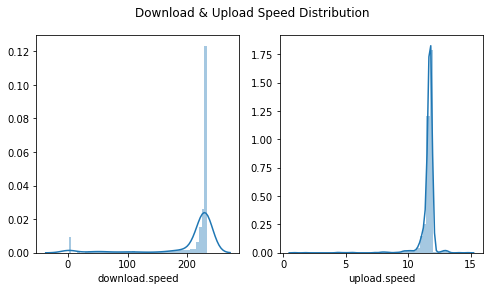

In [4]:
dt['download.speed'] = dt['download.bytes'] / dt['download.elapsed'] * 8 / 1000
dt['upload.speed'] = dt['upload.bytes'] / dt['upload.elapsed'] * 8 / 1000

fig, axs = plt.subplots(figsize=(8, 4), ncols=2)
fig.suptitle('Download & Upload Speed Distribution')
sns.distplot(dt['download.speed'], ax=axs[0])
sns.distplot(dt['upload.speed'], ax=axs[1])


In [5]:
dt[['download.speed', 'upload.speed']].describe()

,download.speed,upload.speed
count,2077.000000,2077.000000
mean,205.480479,11.601951
std,59.482408,0.689184
min,1.227206,0.933022
25%,221.615584,11.633070
50%,230.283028,11.750296
75%,231.509689,11.797691
max,233.717545,14.798215


<ErrorbarContainer object of 3 artists>

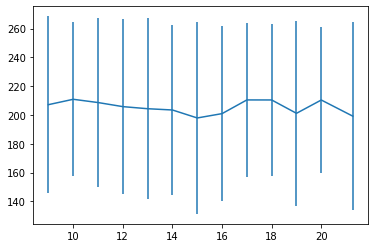

In [6]:
from scipy.interpolate import CubicSpline

ddt = pd.concat([dt['time'].apply(lambda t: (t.hour * 3600 + t.minute * 60 + t.second) / 3600), dt['download.speed']], axis=1)
ddt = ddt[ddt.time > 7]
buckets = np.arange(9, 22, 1)
groups = ddt.groupby(np.digitize(ddt.time, buckets))
m = groups.mean()

groups.std()
fig, ax = plt.subplots()
ax.errorbar(m['time'], m['download.speed'], yerr=groups.std()['download.speed'])

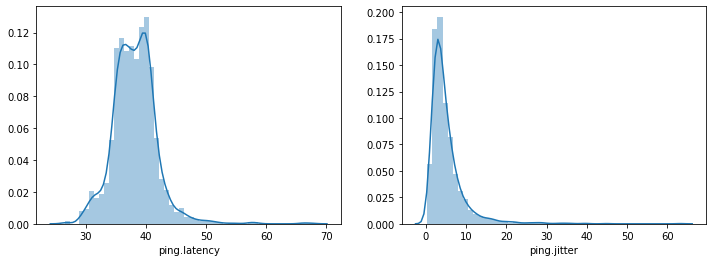

In [12]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

sns.distplot(dt['ping.latency'], ax=axs[0]);
sns.distplot(dt['ping.jitter'], ax=axs[1]);

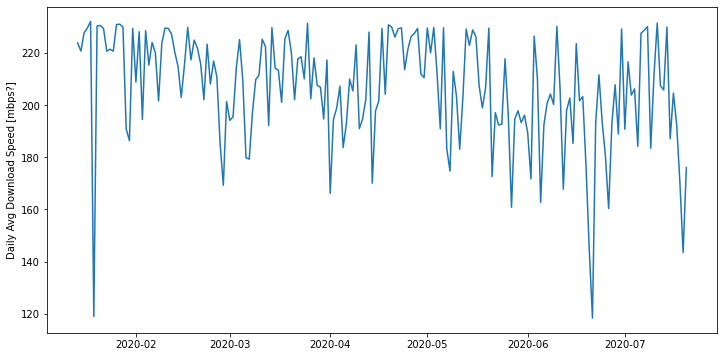

In [44]:
dt['date'] = dt['timestamp'].dt.date
fig, ax1 = plt.subplots(figsize=(12, 6))
#ax2 = ax1.twinx()
group = dt.groupby(['date'])
dd = group.mean()

#ax.plot(d['date'], d['download.speed'])
ax1.plot(dd['download.speed'])
ax1.set_ylabel('Daily Avg Download Speed [mbps?]')
None
#ax2.plot(d['ping.latency'], 'r')